# LCE Topological Display

In [1]:
import ipympl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas
from mpl_toolkits import mplot3d
from matplotlib import cm

sns.set_context('notebook',font_scale=1.5)
sns.set_style(style='whitegrid')

%matplotlib notebook

Inputting the max strain the LCE can actuate. This dictates the height of each voxel by relating the area of the original circle of the flat voxel to the surface area of a cone. The voxels plotted aren't exactly cones - this is just a rough estimate of the height we could achieve


In [2]:
strain = 100

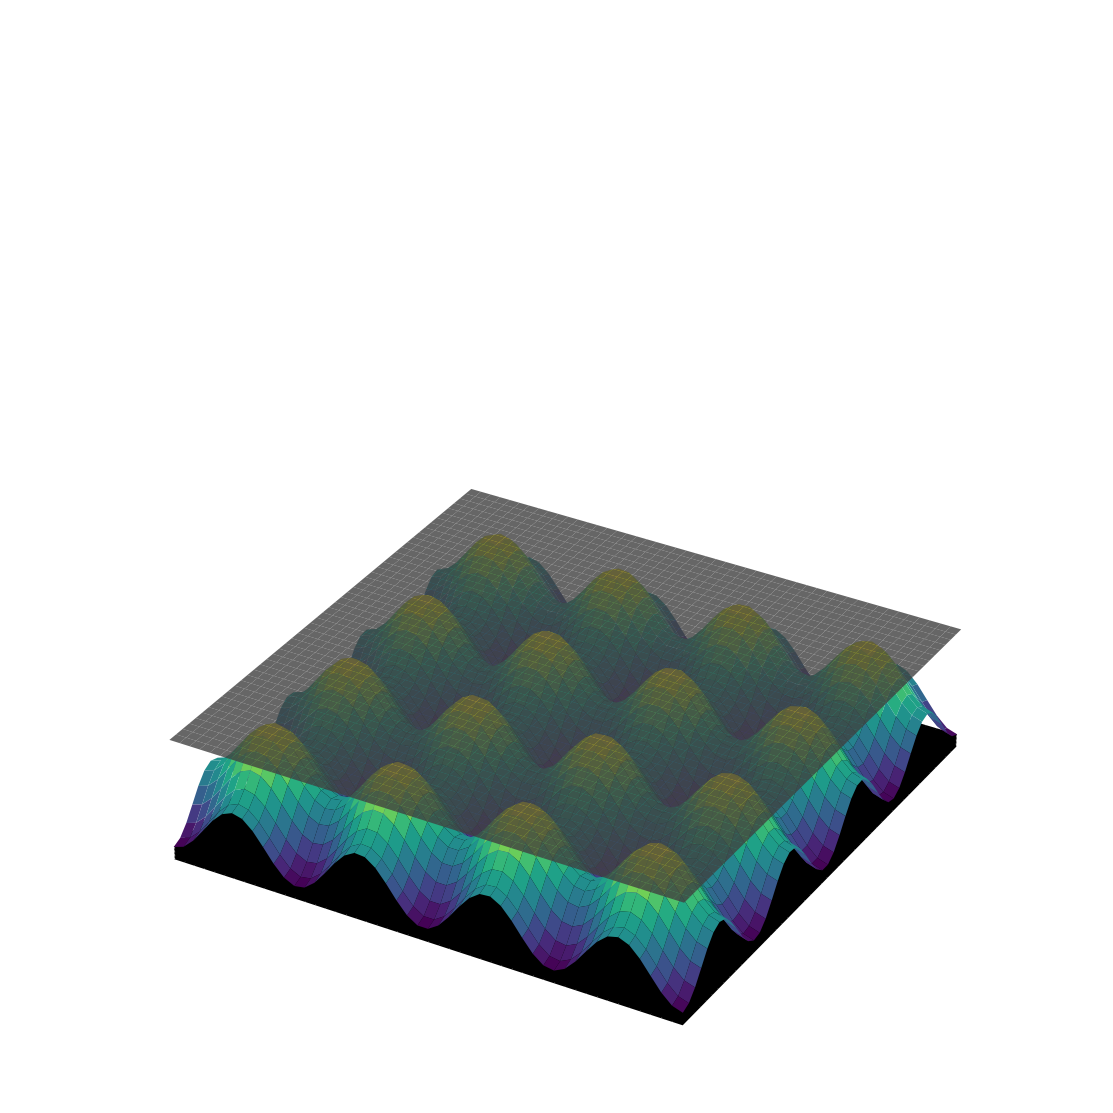

In [101]:
fig = plt.figure(figsize=(20,20))
ax = plt.axes(aspect = 'equal',projection='3d')

num_of_peaks = 4 # number of voxels wanted in the x, y axis
strain = strain/100 # put strain from % to u/u units
r = 1 # radius of the voxel
h = np.sqrt((r)**2*(strain+1)**2-(r)**2) # height of the voxel as a function of the strain and radius
# making the mesh grid of x,y 
x = np.linspace(0,2*num_of_peaks*r);y = np.linspace(0,2*num_of_peaks*r)
X, Y = np.meshgrid(x, y)         

# getting Z for the LCE
Z = h/4*(-np.cos(X*np.pi/(r))-np.cos(Y*np.pi/(r))) + h/2
# Plotting Z for the IR absorbing Substrate
for i in np.linspace(0,.2,num=10):
    Z_sub = X*0 - i
    ax.plot_surface(X, Y, Z_sub, linewidth=0,color='k')
#Plotting the LCE
ax.plot_surface(X, Y, Z, linewidth=0,cmap=cm.viridis,edgecolor='none')
# Plotting the top elastomer
ax.plot_surface(X,Y,X*0+h,color='gray',linewidth=0,alpha=0.8)
# Setting the plot x,y,z limits
ax.set_xlim(0,num_of_peaks*r*2);ax.set_ylim(0,num_of_peaks*r*2);ax.set_zlim(0,num_of_peaks*r*2)
ax.set_axis_off()
plt.show()


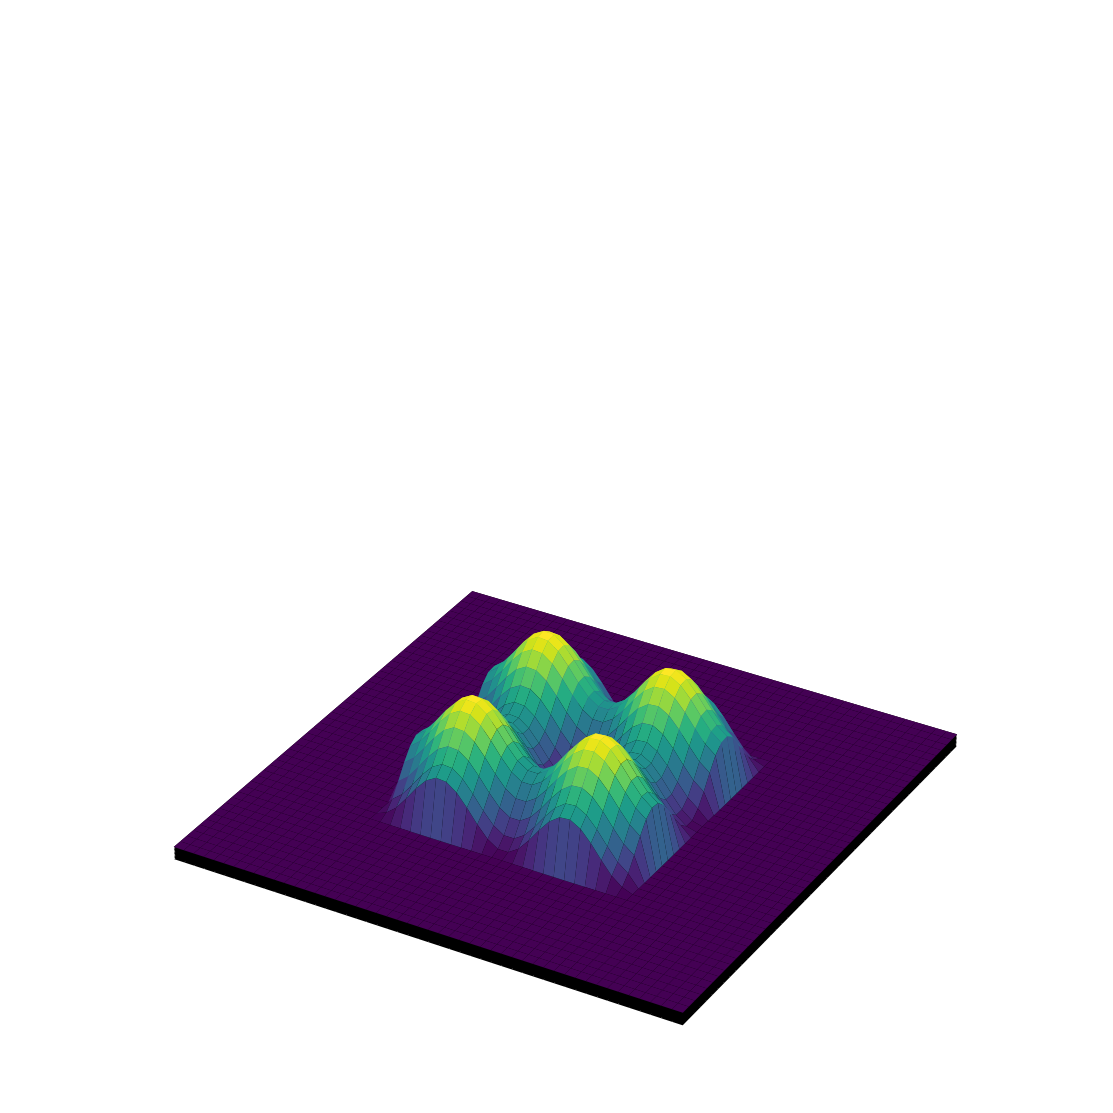

In [113]:
fig = plt.figure(figsize=(20,20))
ax = plt.axes(aspect = 'equal',projection='3d')
num_of_peaks = 4
strain = 1
r = 1
h = np.sqrt((r)**2*(strain+1)**2-(r)**2)
x = np.linspace(0,2*num_of_peaks*r);y = np.linspace(0,2*num_of_peaks*r)
X, Y = np.meshgrid(x, y)        
Z_grid = []
Z_top = []
for i, j in zip(X,Y):
    z_array = []; zt = []
    for l,m in zip(i,j): # l and m represents the a grid of the voxel where each voxel spans m,l = 2
        # Defining the top elastomer zt, or LCE z_array to either be 0 of the original shape at each voxel
        if (m > 2 and m < 4 and l > 2 and l < 4):
            z_array.append(h/4*(-np.cos(l*np.pi/(r))-np.cos(m*np.pi/(r))) + h/2)
            zt.append(h)
        elif (m > 4 and m < 6 and l > 4 and l < 6):
            z_array.append(h/4*(-np.cos(l*np.pi/(r))-np.cos(m*np.pi/(r))) + h/2)
            zt.append(h)
        elif (m > 4 and m < 6 and l > 2 and l < 4):
            z_array.append(h/4*(-np.cos(l*np.pi/(r))-np.cos(m*np.pi/(r))) + h/2)
            zt.append(h)
        elif (m > 2 and m < 4 and l > 4 and l < 6):
            z_array.append(h/4*(-np.cos(l*np.pi/(r))-np.cos(m*np.pi/(r))) + h/2)
            zt.append(h)
        else:
            z_array.append(0)
            zt.append(0)
    Z_grid.append(z_array)
    Z_top.append(zt)
Z_grid = np.array(Z_grid)
Z_top = np.array(Z_top)

# Plotting the IR absorbing Substrate
for i in np.linspace(0,.2,num=10):
    Z_sub = X*0 - i
    ax.plot_surface(X, Y, Z_sub, linewidth=0,color='k')

# Plotting the LCE with certain voxels truncated to 0
ax.plot_surface(X, Y, Z_grid, linewidth=0,cmap=cm.viridis)
# Plotting the top elastomer with certain voxels truncated to 0
ax.plot_surface(X, Y, Z_top, linewidth=0,color='gray',edgecolor='none',alpha=0.7)
# Setting plot x,y,z limits
ax.set_xlim(0,num_of_peaks*r*2);ax.set_ylim(0,num_of_peaks*r*2);ax.set_zlim(0,num_of_peaks*r*2)
ax.set_axis_off()
plt.show()


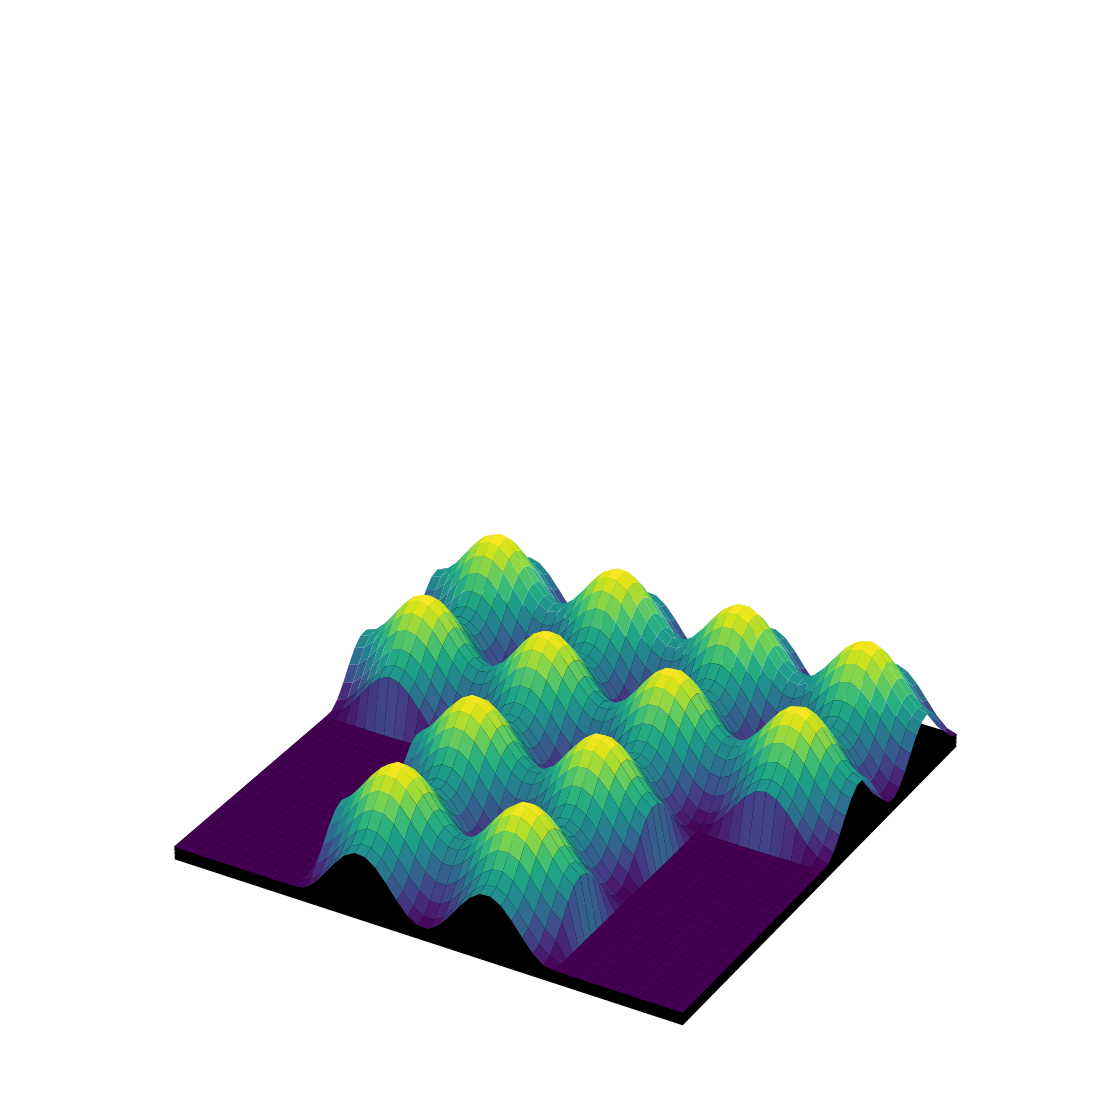

In [111]:
fig = plt.figure(figsize=(20,20))
ax = plt.axes(aspect = 'equal',projection='3d')
num_of_peaks = 4
strain = 1
r = 1
h = np.sqrt((r)**2*(strain+1)**2-(r)**2)
x = np.linspace(0,2*num_of_peaks*r);y = np.linspace(0,2*num_of_peaks*r)
X, Y = np.meshgrid(x, y)        
Z_grid = []
Z_top = []
for i, j in zip(X,Y):
    z_array = []; zt = []
    for l,m in zip(i,j):
        if (m > -1 and m < 4 and l > 2 and l < 6):
            z_array.append(h/4*(-np.cos(l*np.pi/(r))-np.cos(m*np.pi/(r))) + h/2)
            zt.append(h)
        elif (m > 4 and m < 9 and l > -1 and l < 9):
            z_array.append(h/4*(-np.cos(l*np.pi/(r))-np.cos(m*np.pi/(r))) + h/2)
            zt.append(h)
        else:
            z_array.append(0)
            zt.append(0)
    Z_grid.append(z_array)
    Z_top.append(zt)
Z_grid = np.array(Z_grid)
Z_top = np.array(Z_top)
for i in np.linspace(0,.2,num=10):
    Z_sub = X*0 - i
    ax.plot_surface(X, Y, Z_sub, linewidth=0,color='k')


ax.plot_surface(X, Y, Z_grid, linewidth=0,cmap=cm.viridis)
ax.plot_surface(X, Y, Z_top, linewidth=0,color='gray',edgecolor='none',alpha=0.7)


ax.set_xlim(0,num_of_peaks*r*2);ax.set_ylim(0,num_of_peaks*r*2);ax.set_zlim(0,num_of_peaks*r*2)
ax.set_axis_off()
plt.show()


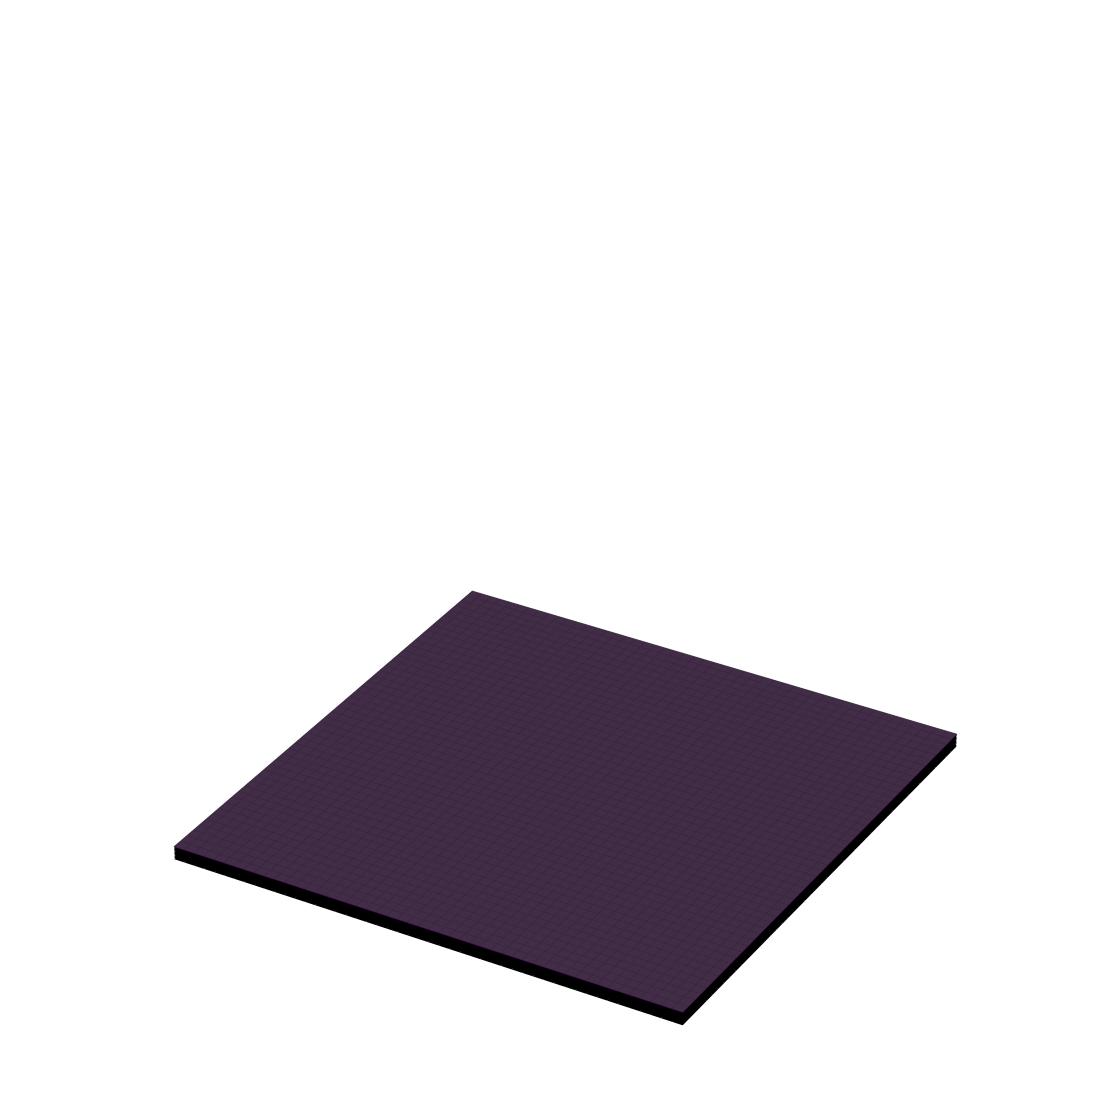

In [117]:
fig = plt.figure(figsize=(20,20))
ax = plt.axes(aspect = 'equal',projection='3d')

for i in np.linspace(0,.2,num=10):
    Z_sub = X*0 - i
    ax.plot_surface(X, Y, Z_sub, linewidth=0,color='k')

ax.plot_surface(X, Y, X*0, linewidth=0,cmap=cm.viridis)
ax.plot_surface(X, Y, X*0+.01, linewidth=0,color='gray',edgecolor='none',alpha=0.7)
ax.set_xlim(0,num_of_peaks*r*2);ax.set_ylim(0,num_of_peaks*r*2);ax.set_zlim(0,num_of_peaks*r*2)
ax.set_axis_off()
plt.show()